## **Group Assignment  Task 2 (Classification)**

*Link Google Colab:* https://colab.research.google.com/drive/1MZTEU4OUHiY6ex63O3OBLfDwBGWqb5cd?usp=sharing


**Group 6 Member Name:**

1) MAULIDINA CAHAYA RANI

2) DIMAS RAMADHANI

3) EKKLESIAFILIFI LOYALITA CROSSESA

4) AGUSTIAN ARDIANSYA

In [1]:
# Import Required Basic Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import plot_tree

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder  # Optional if the labels are not in numerical values

In [2]:
# Read the csv file with GitHub URL that will be used as a dataset
url = "https://github.com/ekklesia24/Celerates-Batch-7_Group-Assignment-Classification-/raw/c60626de70fdb69a23b0e4f678cb5c333e352cb1/heart.csv"
df = pd.read_csv(url)
df.shape # Display the number of rows and columns in the dataset

(303, 14)

In [3]:
df.head() # Display the first 5 rows in the dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Checking if there are missing values or not
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [5]:
# Display detailed information on the dataset based on each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df['target'].value_counts()

,count
target,
1,165
0,138


In [8]:
X = df.drop("target", axis=1)
Y = df.target

In [9]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(242, 13) (61, 13)
(242,) (61,)


# Machine Learning ~ Random Forest Classifier

In [10]:
y_train.value_counts()

,count
target,
1,133
0,109


In [11]:
y_test.value_counts()

,count
target,
1,32
0,29


In [12]:
# Modeling with Rendom Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
# evaluation
y_pred_RFC = rf.predict(x_test)
print(classification_report(y_test, y_pred_RFC))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



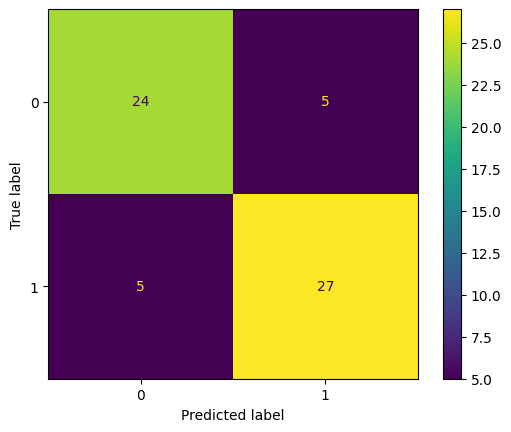

In [14]:
#Visualisasi confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_RFC)


*   Prediksi 0, kunci jawaban 0 = 24 data
*   Prediksi 0, kunci jawaban 1 = 5 data
*   Prediksi 1, kunci jawaban 0 = 5 data
*   Prediksi 1, kunci jawaban 1 = 27 data

# Deep Learning ~ ANN Classification

In [15]:
np.random.seed(42)
tf.random.set_seed(42)

In [16]:
dummy_y = to_categorical(Y)

In [17]:
print(dummy_y.shape)
print(f"before: {Y[0]}, after: {dummy_y[0]}")

(303, 2)
before: 1, after: [0. 1.]


In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, dummy_y, train_size=0.8)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(242, 13) (61, 13)
(242, 2) (61, 2)


In [19]:
model_ANN = Sequential()
model_ANN.add(Dense(20, input_dim=13, activation='tanh'))  # 13 fitur dalam dataset
model_ANN.add(Dense(16, activation='relu'))
model_ANN.add(Dropout(0.2))
model_ANN.add(Dense(10, activation='relu'))
model_ANN.add(Dense(2, activation='softmax'))  # Keluaran: 2 kelas (0 atau 1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model_ANN.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [21]:
model_ANN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 20)                  │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             170 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │              22 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 808 (3.16 KB)

 Trainable params: 808 (3.16 KB)

 Non-trainable params: 0 (0.00 B)

Data yang dibutuhkan:  
*   data train -> train model
*   data validasi -> train model
*   data test -> test model

In [22]:
history = model_ANN.fit(x_train, y_train, epochs=100, batch_size=5, verbose=1, validation_split=0.2)

Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4340 - loss: 0.8858 - val_accuracy: 0.4898 - val_loss: 0.7051
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5130 - loss: 0.7106 - val_accuracy: 0.4898 - val_loss: 0.7067
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6032 - loss: 0.6855 - val_accuracy: 0.4694 - val_loss: 0.7256
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4636 - loss: 0.7081 - val_accuracy: 0.4898 - val_loss: 0.6996
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5050 - loss: 0.6978 - val_accuracy: 0.6122 - val_loss: 0.6845
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5590 - loss: 0.6981 - val_accuracy: 0.4286 - val_loss: 0.7210
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5048 - loss: 0.7208 - val_accuracy: 0.4286 - val_loss: 0.7300
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4425 - loss: 0.7264 - val_accuracy: 0.4286 -

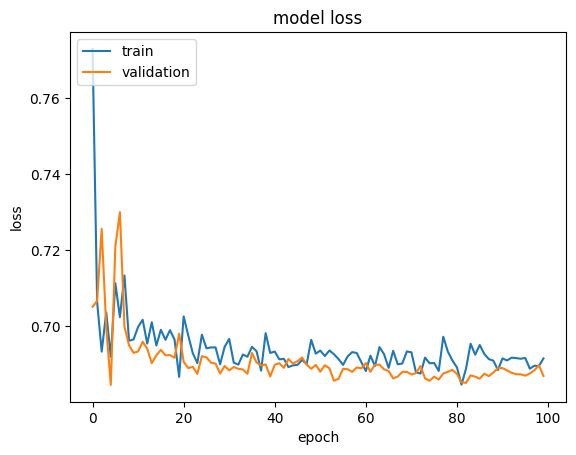

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [24]:
_, accuracy = model_ANN.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy * 100))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5268 - loss: 0.6859 
Accuracy: 52.46


In [25]:
y_pred_ANN = model_ANN.predict(x_test)
y_pred_class_ANN = np.argmax(y_pred_ANN, axis=1)
y_pred_class_ANN

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

<Axes: >

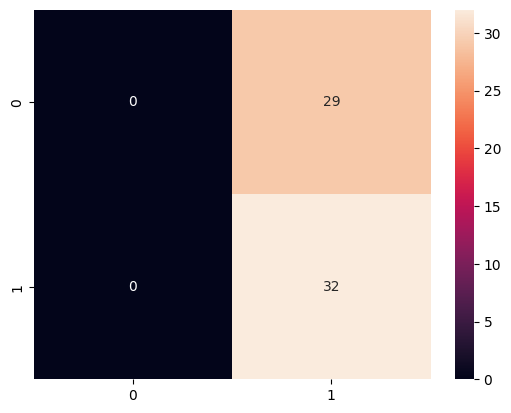

In [26]:
y_test_class_ANN = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_class_ANN, y_pred_class_ANN)
sns.heatmap(cm, annot=True)

## **Perbandingan hasil antara Random Forest Classifier (Machine Learning) dan ANN Classification (Deep Learning):**

Jika dilihat berdasarkan prediksi dari confusion matrix nya, hasil True Positive dengan model algoritma Deep Learning **ANN Classification** lebih baik daripada model algoritma Machine Learning **Random Forest Classifier**.

Namun jika dilihat berdasarkan Akurasi data uji tiap model algoritma, model algoritma Machine Learning **Random Forest Classifier** menunjukkan akurasi lebih tinggi yaitu 84% ketimbang dengan model algoritma Deep Learninng **ANN Classification** yang hanya 52.46%

Sehingga bisa dikatakan model algoritma Machine Learning **Random Forest** adalah pilihan yang lebih baik.